<a href="https://colab.research.google.com/github/ourruti/EstadisticaQ2/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 1

## CARGA DE LA BASE DE DATOS
Selecciona el archivo ejercicio2.csv de tu PC



In [ ]:
from google.colab import files

# Cargar un archivo desde tu PC
uploaded = files.upload()

# Para ver los archivos que fueron cargados
import pandas as pd

# Para leer el archivo y manejar el error de codificación
for filename in uploaded.keys():
    try:
        df = pd.read_csv(filename, encoding='latin1')  # Cambia 'latin1' por la codificación correcta si es necesario
        print(f'Archivo cargado: {filename}')
        print(df.head())  # Muestra las primeras filas del DataFrame
    except Exception as e:
        print(f'Error al cargar el archivo {filename}: {e}')

Saving Ejercicio2.csv to Ejercicio2.csv
Archivo cargado: Ejercicio2.csv
   ID                      HP       City   Time        Day      BW  BPD   AD  \
0   1  H.G.U.Gregorio Marañón     Madrid  13:20    Viernes  2200.0   82   90   
1   2        H.U.de Bellvitge  Barcelona  11:00      Lunes  4100.0   97  129   
2   3        H.U.de Bellvitge  Barcelona  00:00     Martes  4200.0   97  133   
3   4                H.Clínic  Barcelona  18:38     Jueves  1300.0   74   71   
4   5       H.U.12 de octubre     Madrid  09:53  Miércoles  1150.0   68   80   

  Sex  Ge Sm  
0   M  33  N  
1   M  43  N  
2   F  43  N  
3   M  33  S  
4   F  33  S  


##Visualiza la dataset

In [ ]:
df.head()

,ID,HP,City,Time,Day,BW,BPD,AD,Sex,Ge,Sm
0,1,H.G.U.Gregorio Marañón,Madrid,13:20,Viernes,2200.0,82,90,M,33,N
1,2,H.U.de Bellvitge,Barcelona,11:00,Lunes,4100.0,97,129,M,43,N
2,3,H.U.de Bellvitge,Barcelona,00:00,Martes,4200.0,97,133,F,43,N
3,4,H.Clínic,Barcelona,18:38,Jueves,1300.0,74,71,M,33,S
4,5,H.U.12 de octubre,Madrid,09:53,Miércoles,1150.0,68,80,F,33,S


## Realizar un análisis descriptivo visual  y evaluar las correlaciones entre las variables numéricas. (0.5 punto).

Si las variables son numéricas, utilizad histogramas y gráficos de cajas, si son categóricas, gráfico de barras.

En colab, podemos utilizar Géminis que nos ayude!!

<ipython-input-4-90d7fb11427c>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time2'] = pd.to_datetime(df['Time'])


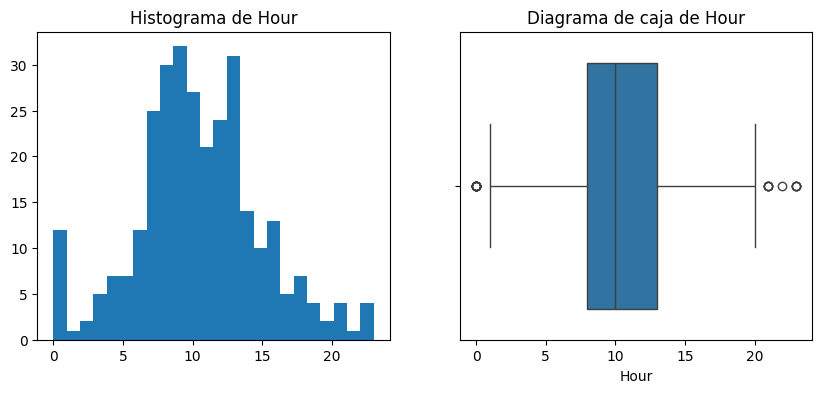

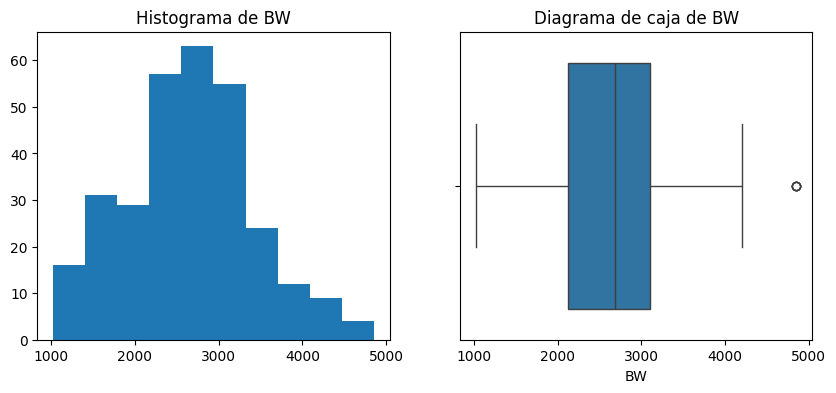

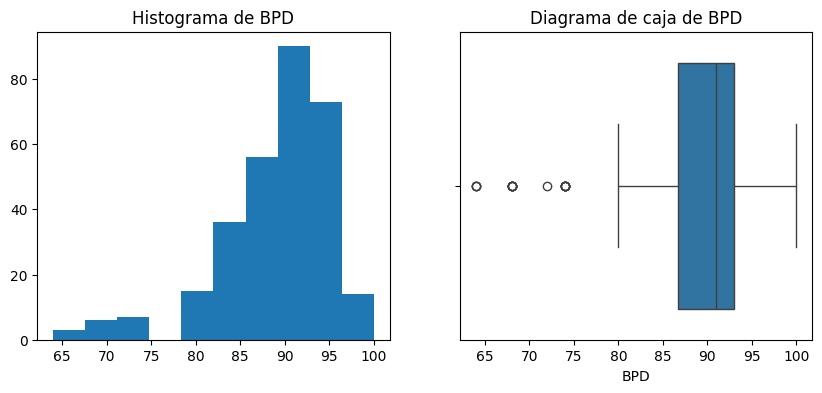

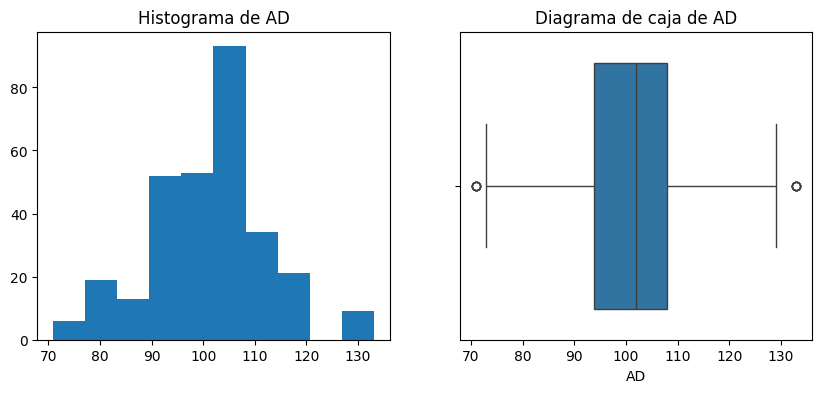

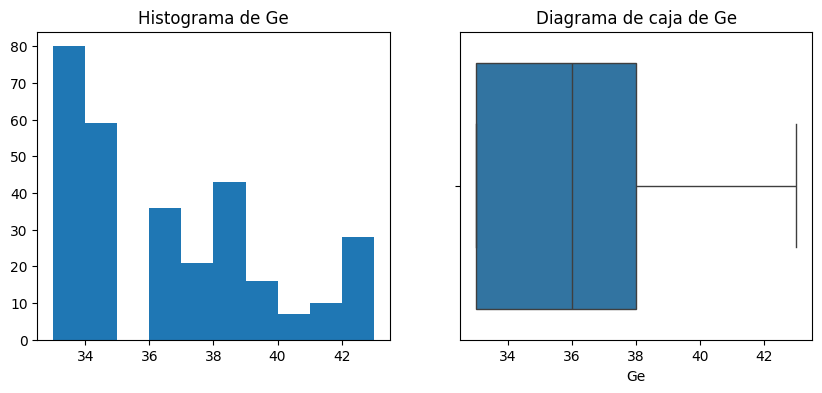

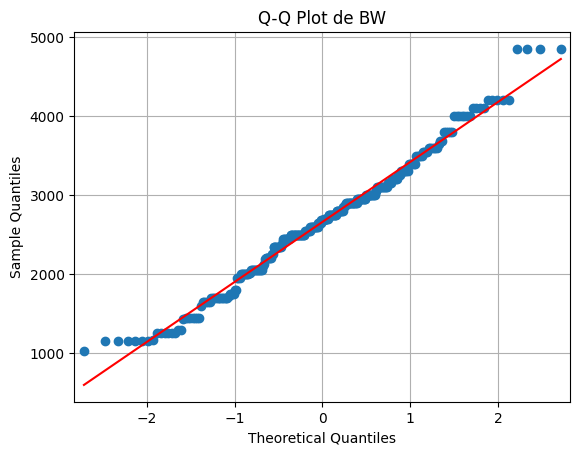

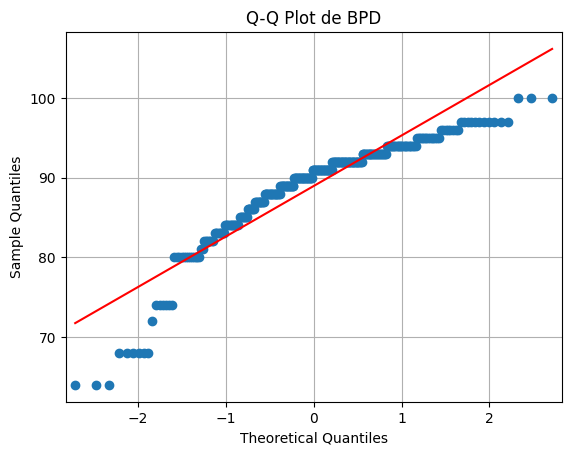

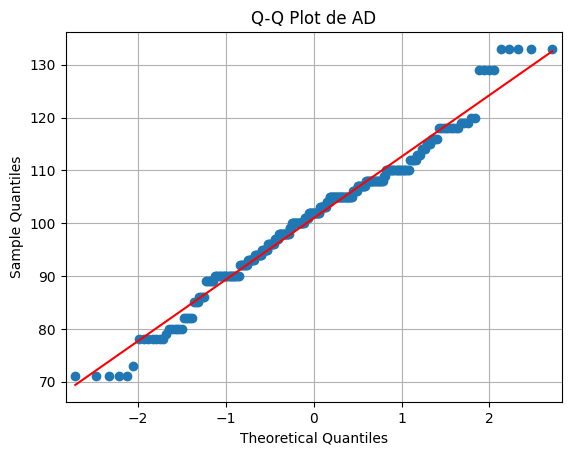

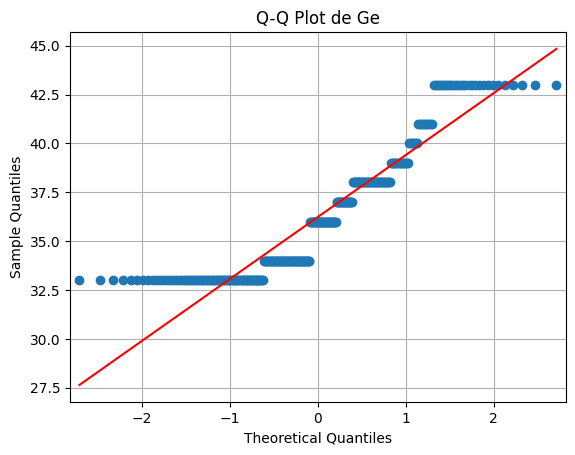

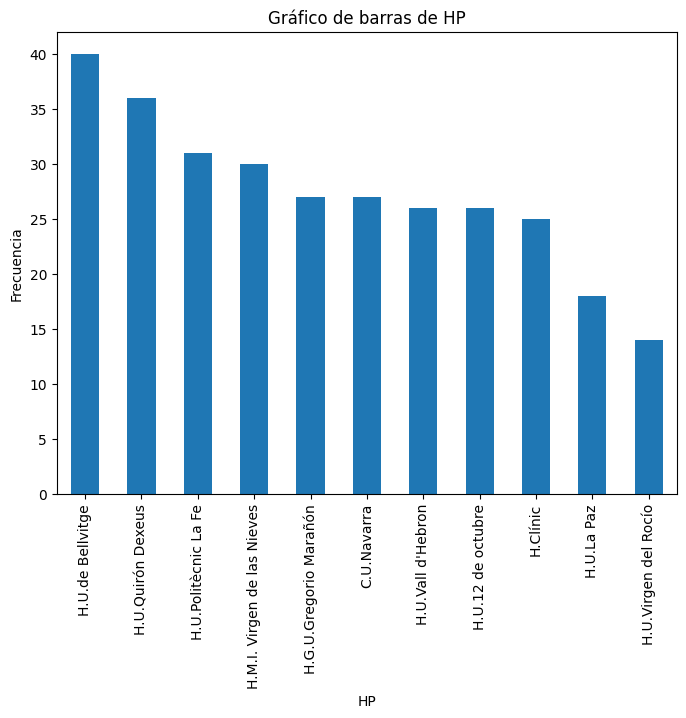

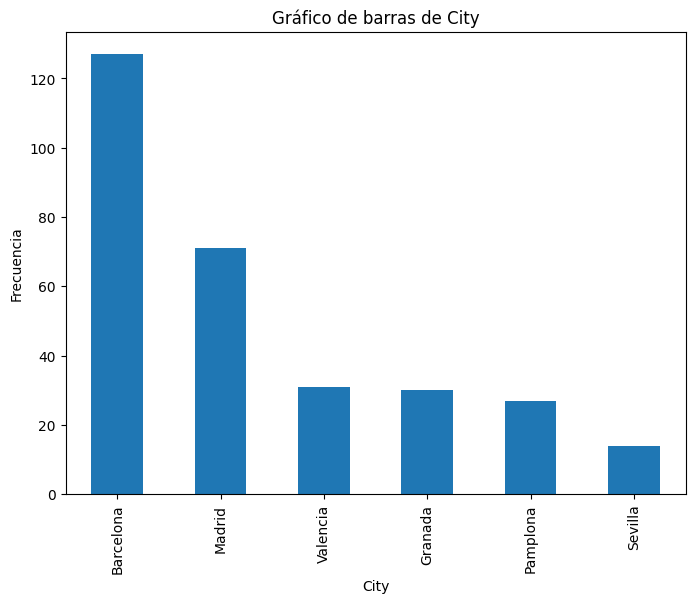

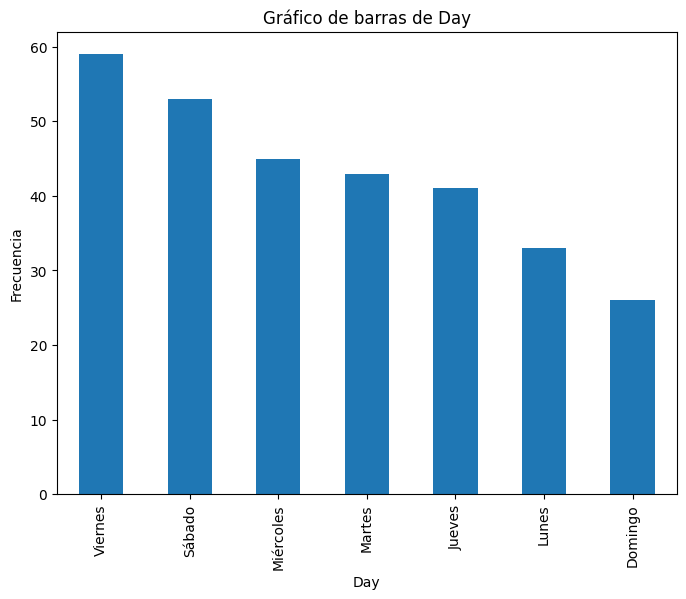

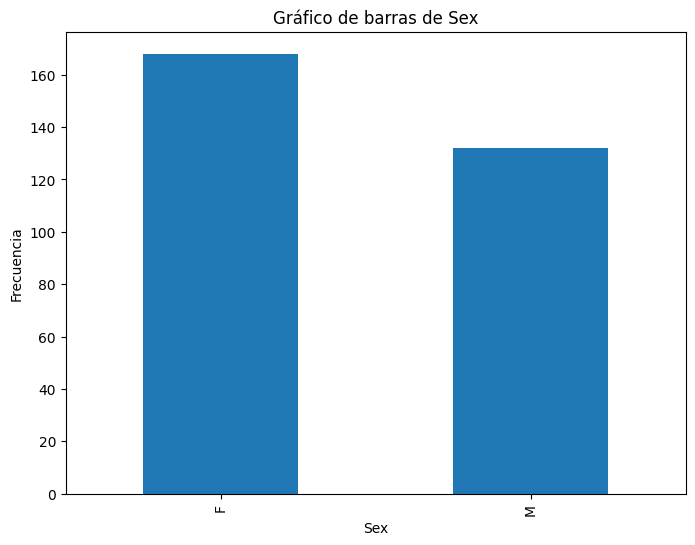

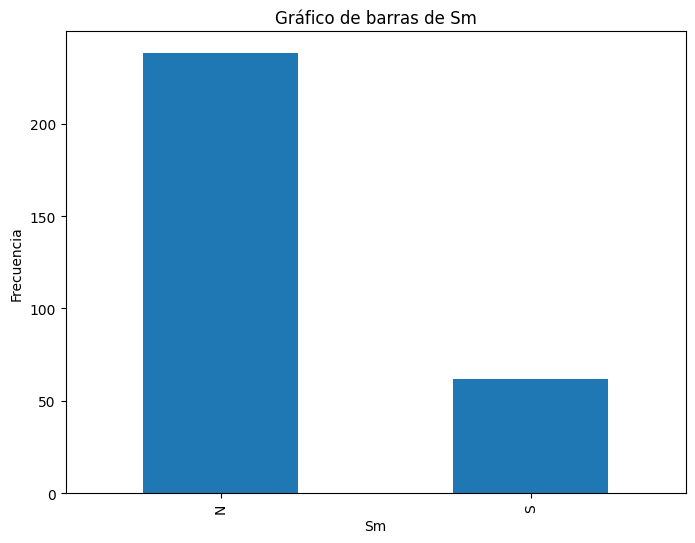

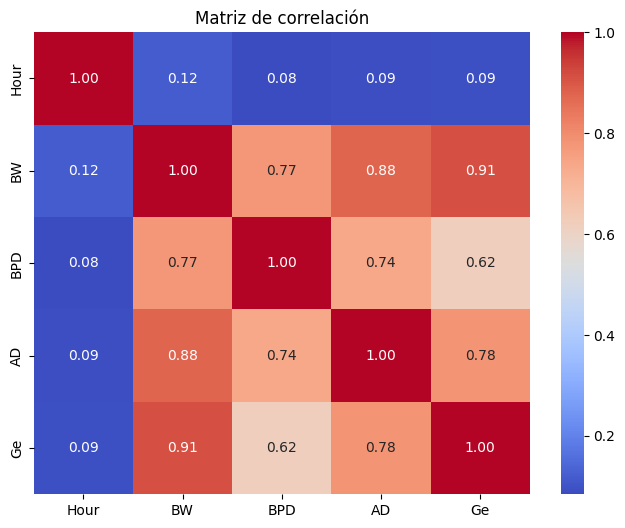

          Hour        BW       BPD        AD        Ge
Hour  1.000000  0.118153  0.084219  0.090650  0.092675
BW    0.118153  1.000000  0.774922  0.875219  0.913866
BPD   0.084219  0.774922  1.000000  0.735707  0.618140
AD    0.090650  0.875219  0.735707  1.000000  0.782326
Ge    0.092675  0.913866  0.618140  0.782326  1.000000
Interpretación de la matriz de correlación:
Existe una correlación positiva  significativa entre BW y BPD (r = 0.77)
Existe una correlación positiva  significativa entre BW y AD (r = 0.88)
Existe una correlación positiva  significativa entre BW y Ge (r = 0.91)
Existe una correlación positiva  significativa entre BPD y AD (r = 0.74)
Existe una correlación positiva  significativa entre BPD y Ge (r = 0.62)
Existe una correlación positiva  significativa entre AD y Ge (r = 0.78)
Kolmogorov-Smirnov test for BW:
  K-statistic: 1.00
  P-value: 0.00
  The data in BW does not follow a normal distribution.


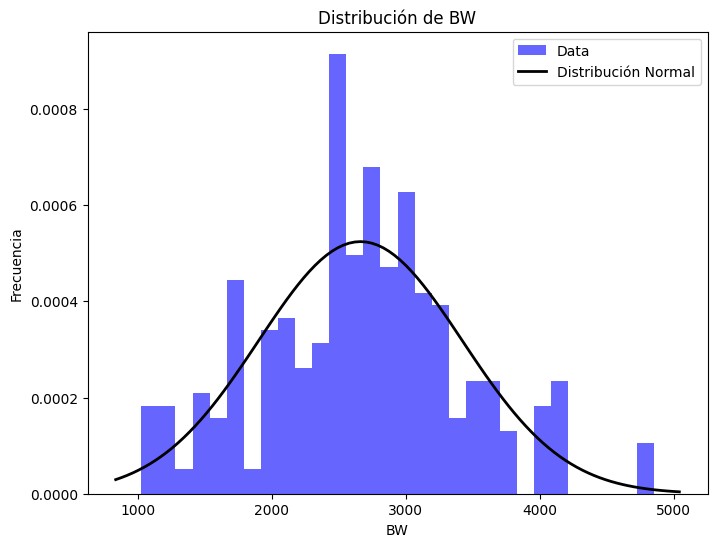

Kolmogorov-Smirnov test for BPD:
  K-statistic: 1.00
  P-value: 0.00
  The data in BPD does not follow a normal distribution.


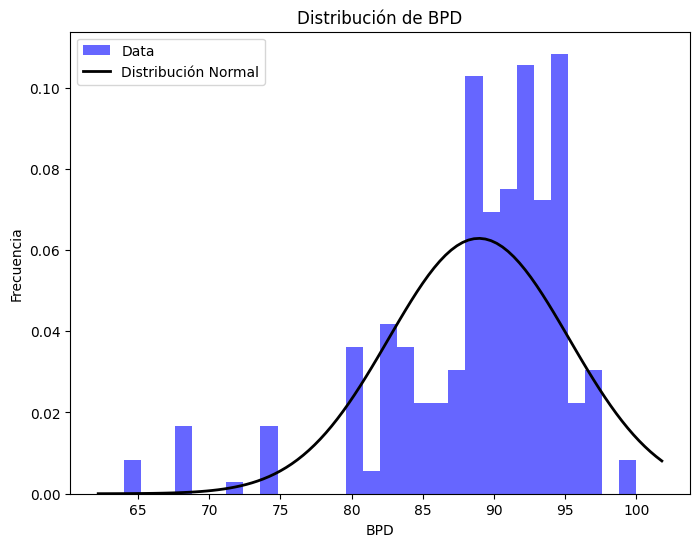

Kolmogorov-Smirnov test for AD:
  K-statistic: 1.00
  P-value: 0.00
  The data in AD does not follow a normal distribution.


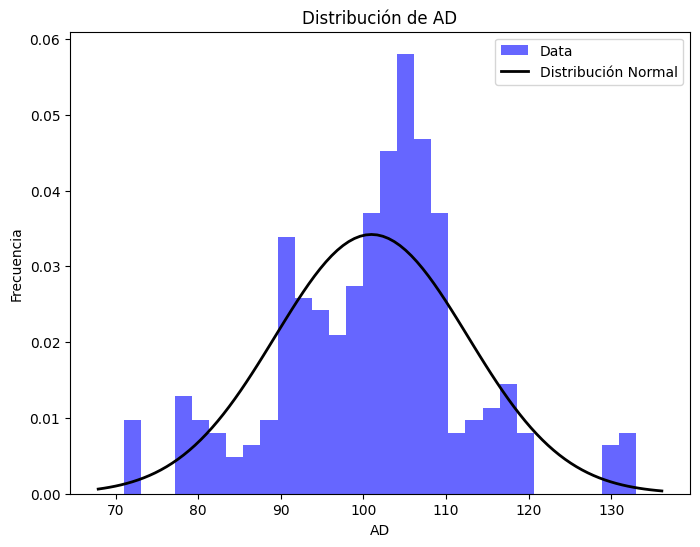

Kolmogorov-Smirnov test for Ge:
  K-statistic: 1.00
  P-value: 0.00
  The data in Ge does not follow a normal distribution.


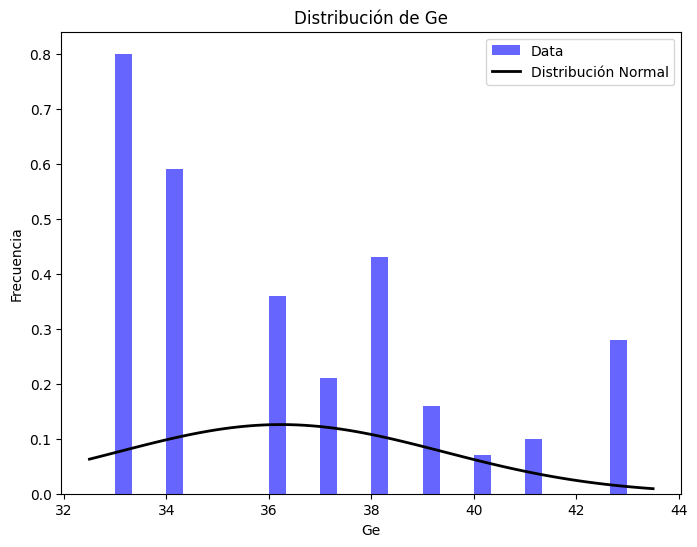

Kolmogorov-Smirnov test for Hour:
  K-statistic: 0.95
  P-value: 0.00
  The data in Hour does not follow a normal distribution.


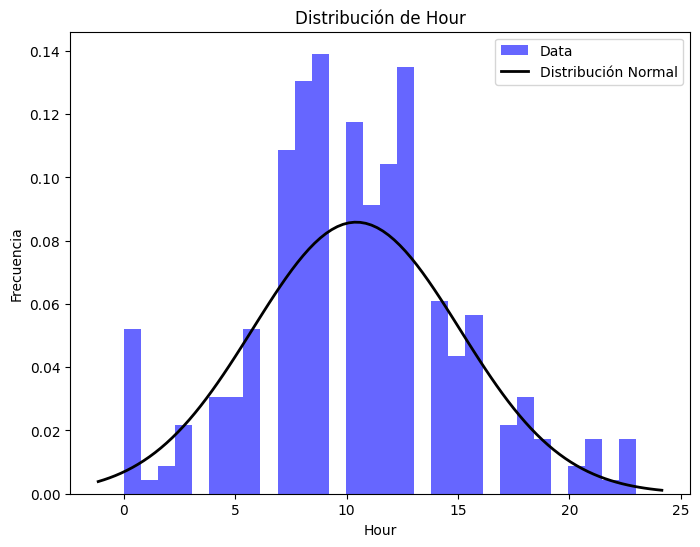

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import kstest, norm
import seaborn as sns

# Convert 'time' column to datetime objects
df['Time2'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time2'].dt.hour

# Histogramas y diagramas de caja para variables numéricas
numerical_cols = ['Hour','BW', 'BPD', 'AD', 'Ge']
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    if col == 'Hour':
        plt.hist(df[col], bins=24)  # Ajusta el número de bins según sea necesario
    else:
        plt.hist(df[col], bins=10)  # Ajusta el número de bins según sea necesario
    plt.title(f'Histograma de {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Diagrama de caja de {col}')
    plt.show()


# Crear Q-Q plots para cada variable
for var in numerical_cols:
    if var != 'Hour':
        sm.qqplot(df[var].dropna(), line='s')
        plt.title(f"Q-Q Plot de {var}")
        plt.grid(True)
        plt.show()

# Gráficos de barras para variables categóricas
categorical_cols = ['HP', 'City', 'Day', 'Sex', 'Sm']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


# Matriz de correlación entre variables numéricas
correlation_matrix = df[numerical_cols].corr()

# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

print(correlation_matrix)

# Interpretación de la matriz de correlación
print("Interpretación de la matriz de correlación:")
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        correlation = correlation_matrix.iloc[i, j]
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]
        if abs(correlation) > 0.5:  # Umbral para considerar correlación significativa
            print(f"Existe una correlación { 'positiva' if correlation>0 else 'negativa'}  significativa entre {col1} y {col2} (r = {correlation:.2f})")

# Check if the dataframe 'df' exists and has a numeric column
if 'df' in locals() and any(pd.api.types.is_numeric_dtype(df[col]) for col in df.columns):
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
      if col != 'ID':
        # Kolmogorov-Smirnov test
        estadistico, p = kstest(df[col], 'norm')  # Test against normal
        print(f'Kolmogorov-Smirnov test for {col}:')
        print(f'  K-statistic: {estadistico:.2f}')
        print(f'  P-value: {p:.2f}')
        alpha = 0.05
        if p < alpha:
            print(f'  The data in {col} does not follow a normal distribution.')
        else:
            print(f'  The data in {col} may follow a normal distribution.')


        # Plot the distribution
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=30, density=True, alpha=0.6, color='b', label='Data')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, loc=df[col].mean(), scale=df[col].std())
        plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.show()
else:
    print("DataFrame 'df' not found or does not contain numeric columns.")

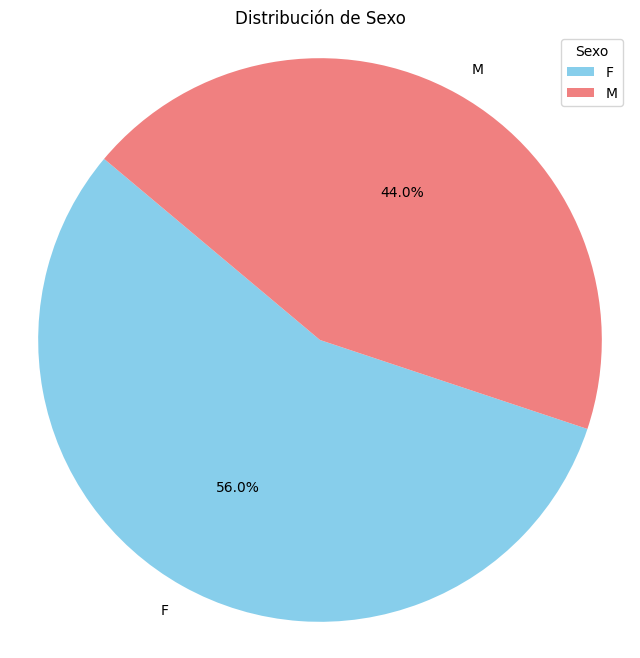

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que 'df' es tu DataFrame y ya está cargado

# Contar las ocurrencias de cada categoría en la columna 'Sex'
sex_counts = df['Sex'].value_counts()

# Definir colores
colors = ['skyblue', 'lightcoral'] # Puedes cambiar los colores si lo deseas

# Crear el gráfico de sectores
plt.figure(figsize=(8, 8)) # Ajusta el tamaño si es necesario
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Añadir título y leyenda
plt.title('Distribución de Sexo')
plt.legend(sex_counts.index, title="Sexo")

# Asegurar que el gráfico sea un círculo
plt.axis('equal')

# Mostrar el gráfico
plt.show()

## Asunción de normalidad. Evaluar si las variables numéricas provienen de una distribución normal y si se ajustan a las exigencias de un test ANOVA (0.5).
Evaluar un test ANOVA que analice el peso del bebé y la categoría “madre fumadora”, y también un test NO paramétrico (1 punto).


In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Análisis ANOVA
model = ols('BW ~ C(Sm)', data=df).fit()  # C(Sm) considera 'Sm' como categórica
anova_result = sm.stats.anova_lm(model, typ=1)
print("Resultados del ANOVA:\n", anova_result)

Resultados del ANOVA:
              df        sum_sq       mean_sq          F        PR(>F)
C(Sm)       1.0  7.855894e+07  7.855894e+07  247.58042  5.018560e-41
Residual  298.0  9.455742e+07  3.173068e+05        NaN           NaN


In [ ]:
import scipy.stats as stats
import pandas as pd

# Test no paramétrico: Kruskal-Wallis
# Agrupar datos por los grupos de fumadores y no fumadores
grouped_data = [group['BW'].values for name, group in df.groupby('Sm')]
kruskal_result = stats.kruskal(*grouped_data)
print("\nResultados del Test de Kruskal-Wallis:")
print(f'Estadística: {kruskal_result.statistic}, p-valor: {kruskal_result.pvalue}')

# Test de Mann-Whitney
# Separar los datos de peso del bebé en dos grupos: madres fumadoras (Sm=1) y no fumadoras (Sm=0)
grupo_no_fumadoras = df[df['Sm'] == 'N']['BW']
grupo_fumadoras = df[df['Sm'] == 'S']['BW']

# Realizar el test de Mann-Whitney U
# Se usa 'nan_policy="omit"' para manejar posibles valores faltantes
mannwhitneyu_result = stats.mannwhitneyu(grupo_no_fumadoras, grupo_fumadoras, nan_policy='omit')

print("Resultados del Test de Mann-Whitney U:")
print(f'Estadística U: {mannwhitneyu_result.statistic}, p-valor: {mannwhitneyu_result.pvalue}')


Resultados del Test de Kruskal-Wallis:
Estadística: 129.72776606466724, p-valor: 4.700148357087779e-30
Resultados del Test de Mann-Whitney U:
Estadística U: 14304.0, p-valor: 4.744709133984515e-30


In [ ]:
df.columns

Index(['ID', 'HP', 'City', 'Time', 'Day', 'BW', 'BPD', 'AD', 'Sex', 'Ge', 'Sm',
       'Time2', 'Hour'],
      dtype='object')

In [12]:
import statsmodels.api as sm
import pandas as pd

# Select the dependent variable
y = df['BW']

# List of predictor variables to analyze separately
predictors = ['AD', 'BPD', 'Ge']

for predictor in predictors:
    print(f"\n--- Simple Linear Regression for BW vs {predictor} ---")

    # Select the single predictor variable
    X = df[[predictor]]

    # Add a constant (intercept) to the predictor variable
    X_with_constant = sm.add_constant(X)

    # Create and fit the OLS model
    model = sm.OLS(y, X_with_constant).fit()

    # Print the summary of the model
    print(model.summary())


--- Simple Linear Regression for BW vs AD ---
                            OLS Regression Results                            
Dep. Variable:                     BW   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     975.5
Date:                Mon, 19 May 2025   Prob (F-statistic):           5.41e-96
Time:                        22:30:28   Log-Likelihood:                -2197.7
No. Observations:                 300   AIC:                             4399.
Df Residuals:                     298   BIC:                             4407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

## Vamos a definir la variable peso del bebé como variable dependiente. Y vamos a realizar los siguientes cálculos:
-	Entre las variables numéricas, escoger el modelo de regresión lineal simple que tenga mayor “bondad” en el ajuste (0.5 puntos).


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['AD', 'BPD', 'Ge']]
y = df['BW']

# 1.2 Factor de Inflación de la Varianza (VIF)
print("\n--- Análisis del Factor de Inflación de la Varianza (VIF) ---")
# Para calcular el VIF, utilizamos las variables predictoras (X)

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))


--- Análisis del Factor de Inflación de la Varianza (VIF) ---
  Variable         VIF
2       Ge  286.546556
1      BPD  235.588689
0       AD  230.058272


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X_train)

model = sm.OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     BW   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1024.
Date:                Mon, 19 May 2025   Prob (F-statistic):          5.80e-135
Time:                        22:11:43   Log-Likelihood:                -1621.9
No. Observations:                 240   AIC:                             3252.
Df Residuals:                     236   BIC:                             3266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6562.8498    201.637    -32.548      0.0

# Comentar los resultados

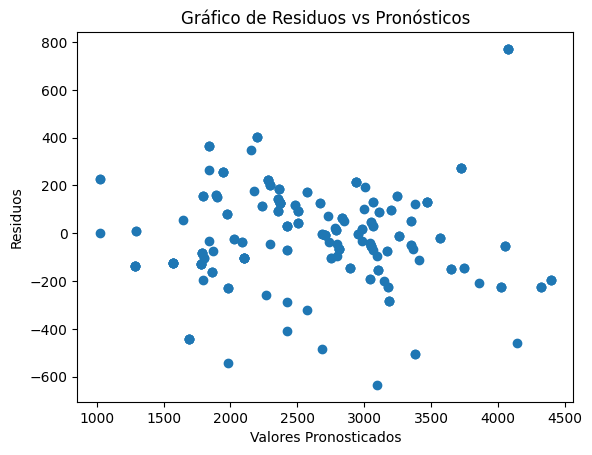

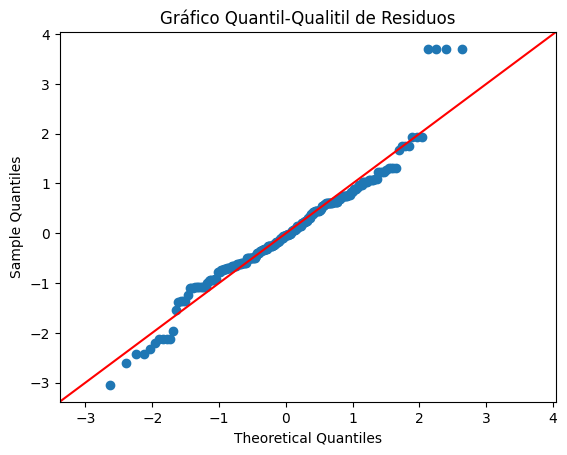

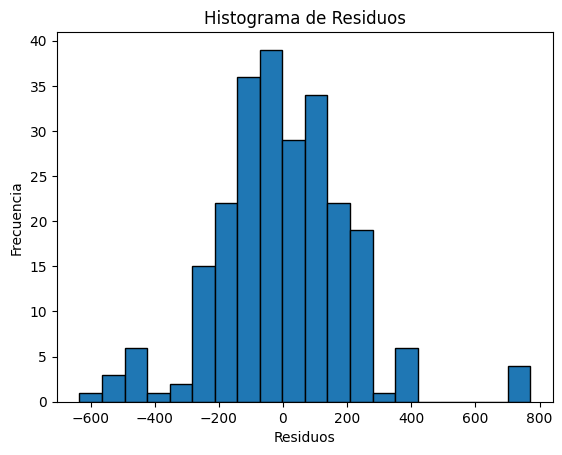

In [ ]:
import matplotlib.pyplot as plt
# Gráfico de residuos vs predicciones
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Valores Pronosticados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Pronósticos')
plt.show()

# Q-Q Plot para verificar la normalidad de los residuos
sm.qqplot(model.resid, line='45', fit=True)
plt.title('Gráfico Quantil-Qualitil de Residuos')
plt.show()

# Histograma de los residuos
plt.hist(model.resid, bins=20, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, model.predict(X_test))

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error (MSE): 41314.3991
Root Mean Squared Error (RMSE): 203.2594
R^2 Score: 0.9065


# Explicar el siguiente gráfico

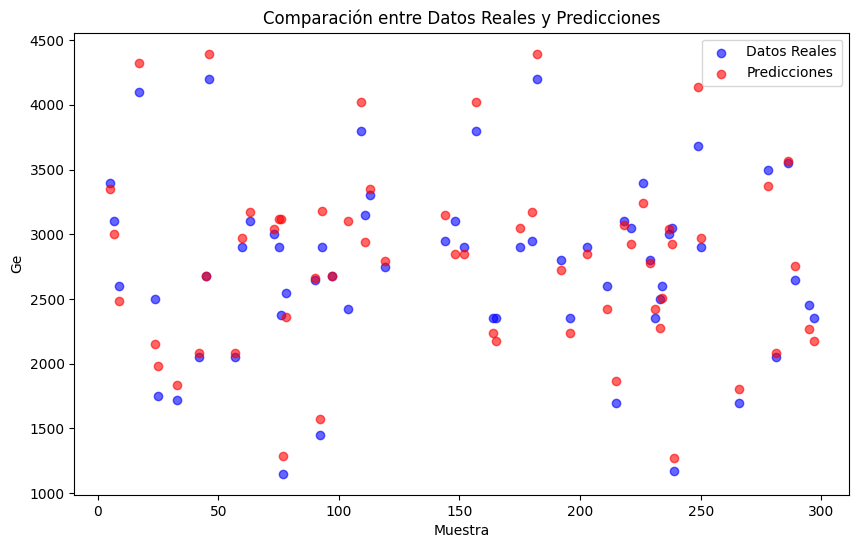

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Datos reales
plt.scatter(y_test.index, y_test, color='blue', label='Datos Reales', alpha=0.6)
# Predicciones como puntos rojos
plt.scatter(y_test.index, y_pred, color='red', label='Predicciones', alpha=0.6)

# Etiquetas y título
plt.xlabel('Muestra')
plt.ylabel('Ge')
plt.title('Comparación entre Datos Reales y Predicciones')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()